In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First, let's get the general strike data and plot it by hour of day.

In [99]:
# Read in the strike data
strikes = pd.read_csv("strikes_2000_2019.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,16,77,86,96,99) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [100]:
# Make a smaller data frame to focus on the strike time and place
strike_times = strikes[['INDX_NR','INCIDENT_DATE ','STATE',
                        'AIRPORT_ID', 'OPERATOR_ID','SPECIES_ID',
                        'DAMAGE','COST_REPAIRS',
                        'INCIDENT_MONTH','INCIDENT_YEAR',
                        'TIME_OF_DAY','TIME',
                        'FAAREGION','ENROUTE','LOCATION',
                        'HEIGHT','SPEED','DISTANCE',
                        'PHASE_OF_FLIGHT',
                        'EFFECT_NONE', 'EFFECT_ABORTED', 
                        'EFFECT_PREC_LAND', 'EFFECT_ENG_SHUT', 
                        'EFFECT_OTH', 'EFFECT_OTHER',
                        'SKY', 'PRECIP_FOG', 'PRECIP_RAIN', 
                        'PRECIP_SNOW', 'PRECIP_NONE', 
                        'BIRDS_SEEN', 'BIRDS_STRUCK', 'SIZE', 
                        'WARNED', 'REMARKS', 'AOS',
                        'OTHER_COST', 'COST_REPAIRS_INFL_ADJ', 
                        'COST_OTHER_INFL_ADJ','COMMENT',
                        'INDICATED_DAMAGE']]

In [101]:
# In the TIME column in the original data set, 
# empty entries are denoted by the string '     '.
# Here we replace all strings of 5 spaces with NaN
# to make empty entries in the TIME column easier to identify.
strike_times = strike_times.replace('     ', np.nan)

In [102]:
# Convert the times in the 'TIME' column to datetime
# Unfortunately this assigns a date of 1900-01-01
strike_times['TIME'] = pd.to_datetime(strike_times['TIME'], 
                                      format= '%H:%M')

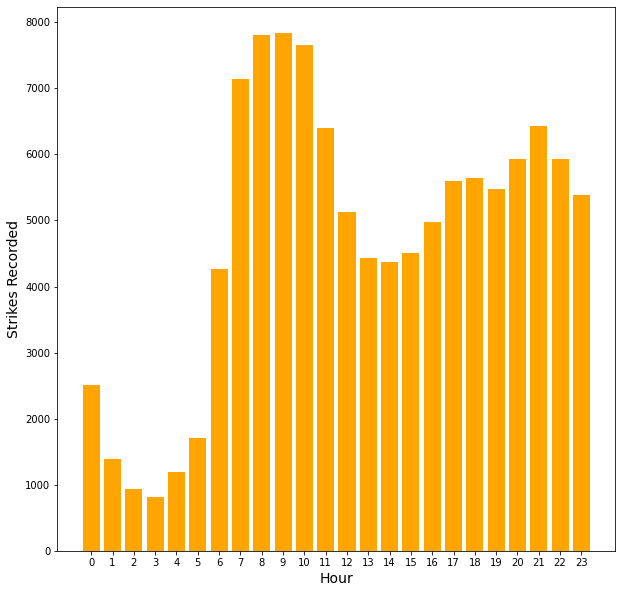

In [103]:
# Plot a bar chart of times by hour

plt.figure(figsize = (10,10))

plt.bar(range(0,24), 
        strike_times['TIME'].groupby(strike_times['TIME'].dt.hour).count(), 
        color = 'orange')
plt.xticks(range(0,24))
plt.xlabel("Hour", fontsize = 14)
plt.ylabel("Strikes Recorded", fontsize = 14)

plt.show()

Next, let's take a look at the strike per month data.

In [57]:
# Read in the strike per month data
strikes_monthly = pd.read_csv("strikes_per_month.csv")

In [104]:
strikes_monthly

,Date,counts,sum,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,StrikesPerFlight,Cost_Per_Flight
0,1/1/03,235.0,1677039.0,2003,1,785651,98053,883704,26.592615,18977.383830
1,2/1/03,191.0,718771.0,2003,2,690750,85965,776715,24.590744,9253.986340
2,3/1/03,304.0,816275.0,2003,3,797634,97929,895563,33.945127,9114.657484
3,4/1/03,438.0,3560638.0,2003,4,766639,89398,856037,51.166013,41594.440430
4,5/1/03,612.0,2742543.0,2003,5,789857,87671,877528,69.741364,31253.054030
...,...,...,...,...,...,...,...,...,...,...
201,10/1/19,1988.0,6213820.0,2019,10,740139,126977,867116,229.265750,71660.769720
202,11/1/19,1085.0,1338930.0,2019,11,694283,120142,814425,133.222826,16440.187860
203,12/1/19,491.0,1283910.0,2019,12,721314,132184,853498,57.527961,15042.917500
204,1/1/20,NaN,NaN,2020,1,700386,127591,827977,NaN,NaN


In [97]:
# Get some basic statistics for strikes per flight data grouped by month
# The StrikesPerFlight column records the number of bird strikes 
# per 100000 flights
strikes_monthly.groupby(strikes_monthly['Month'])['StrikesPerFlight'].describe()

,count,mean,std,min,25%,50%,75%,max
Month,,,,,,,,
1,17.0,42.220449,11.932895,26.592615,31.765640,40.906633,52.945280,63.821405
2,17.0,44.462286,16.414093,24.211857,30.429259,38.384483,60.960939,71.594946
3,17.0,58.943186,17.479158,33.945127,43.060185,56.099204,75.494945,85.495917
4,17.0,94.399900,32.030124,51.166013,65.035879,93.152901,127.660849,139.138571
5,17.0,126.320935,45.400752,68.876186,84.603873,115.362408,173.498077,202.939905
6,17.0,106.213161,37.026503,57.999877,68.210337,99.752517,144.520049,157.880363
7,17.0,156.338829,54.733095,80.759892,102.480619,161.345362,212.348380,238.669661
8,17.0,170.806884,58.088641,92.250329,113.863315,172.229950,228.849742,255.447198
9,17.0,180.042812,62.229518,102.870169,118.732314,175.485945,234.576226,277.527955


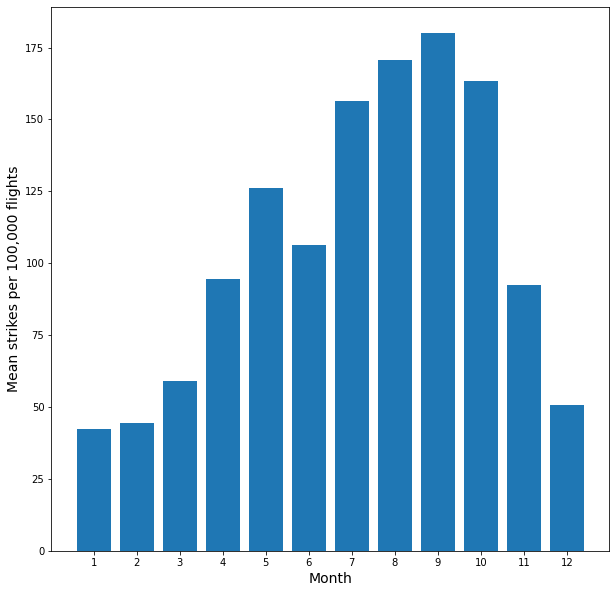

In [126]:
plt.figure(figsize=(10,10))

plt.bar(range(1,13), strikes_monthly.groupby(strikes_monthly['Month'])['StrikesPerFlight'].describe()['mean'])

plt.xlabel('Month', fontsize=14)
plt.ylabel('Mean strikes per 100,000 flights', fontsize=14)
plt.xticks(range(1,13))

plt.show()

To build a model, it might not be enough to use these summaries of strikes per flight by month. So let's look at month data from the original data set.

In [113]:
strike_times['INCIDENT_DATE '] = pd.to_datetime(strike_times['INCIDENT_DATE '])

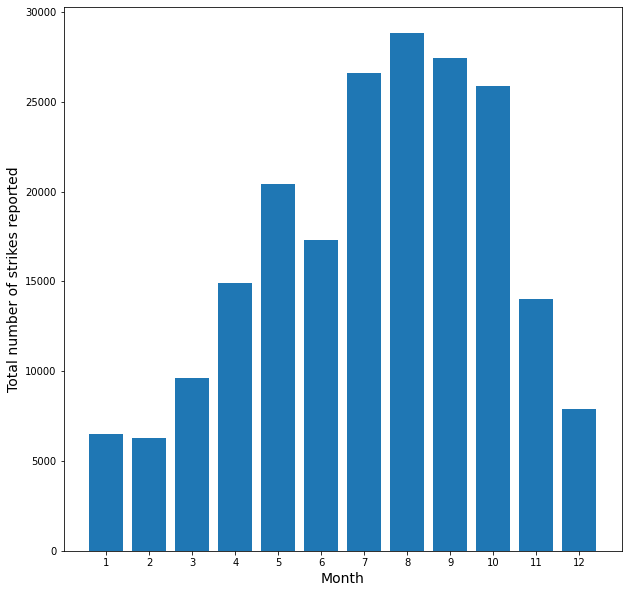

In [128]:
plt.figure(figsize=(10,10))

plt.bar(range(1,13), 
        strike_times['INCIDENT_DATE '].groupby(strike_times['INCIDENT_DATE '].dt.month).count())

plt.xlabel('Month', fontsize=14)
plt.ylabel('Total number of strikes reported', fontsize=14)
plt.xticks(range(1,13))

plt.show()

The above graph doesn't look exactly like the previous one. But the data we're drawing from is slightly different (the date ranges are different), so that's not too surprising. Also, for the first graph, we weighted every year equally; for example, to get the August number we took the mean of the August StrikesPerFlight value for each year. It seems like the second set of month data is a better bet for our model.